In [22]:
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import fitsio
from Correlator import Correlator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
a=Correlator('../../Drive/Simulations/SkyModels/ULSA_maps/200.fits')

1.5679621233924261 XX


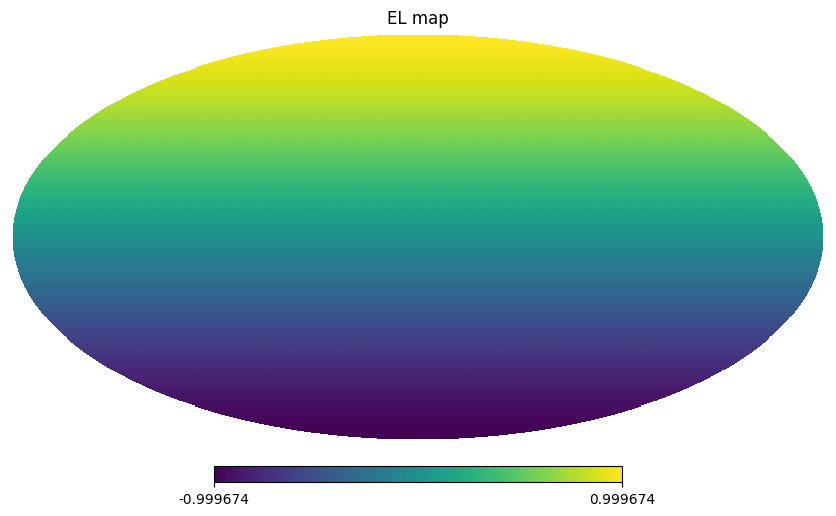

In [24]:
hp.mollview(a.xyz[:,2], title='EL map')

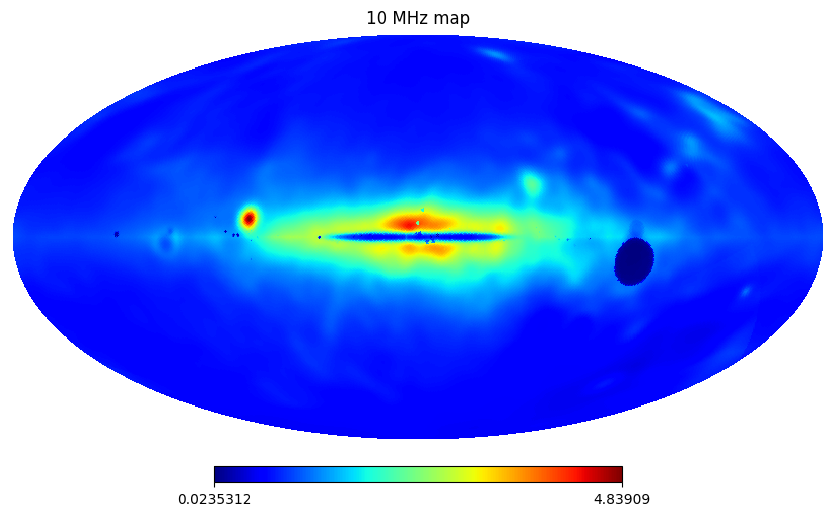

In [25]:
hp.mollview(a.map[20,:], title='10 MHz map', cmap='jet')


1778.3413805939047


[]

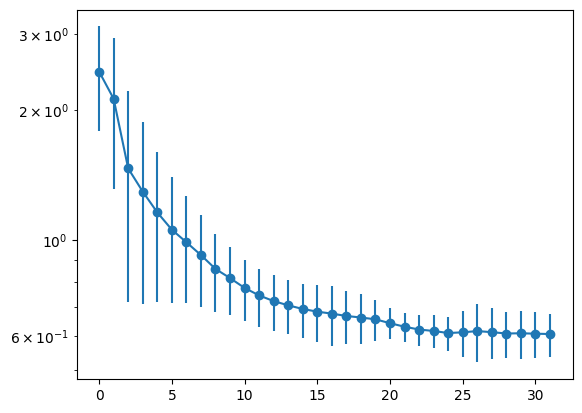

In [26]:
zs = np.arcsin(a.xyz[:,2])
xs = np.arctan2(a.xyz[:,1], a.xyz[:,0])

def bin_by_gal (mp, el_param, Nbins=100, maxpix=20):
    dist = np.sqrt((zs**2+xs**2/el_param))
    dist /= dist.max()
    binmap = np.floor(dist*Nbins).astype(int)
    binmap[binmap>=Nbins] = Nbins-1
    binned_mp = np.zeros(Nbins)
    binned_std = np.zeros(Nbins)
    for i in range(Nbins):
        binned_mp[i] = mp[binmap==i].mean()
        binned_std[i] = mp[binmap==i].std()
    return binned_mp, binned_std,binmap
binned_map, binned_std, binmap = bin_by_gal(a.map[30,:], el_param=500, Nbins=32)
plt.errorbar(range(len(binned_map)), binned_map, yerr=binned_std, marker='o')
print (((binned_map/binned_std)**2).sum())
plt.semilogy()

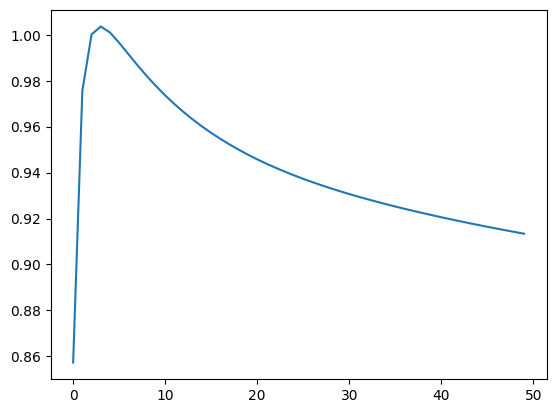

In [36]:
plt.plot(a.map.mean(axis=1))
xmap=a.map/(a.map.mean(axis=1)[:,None]*a.map.mean(axis=0)[None,:])

In [47]:
cors,counts = a.get_correlations(maxpix=2)


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


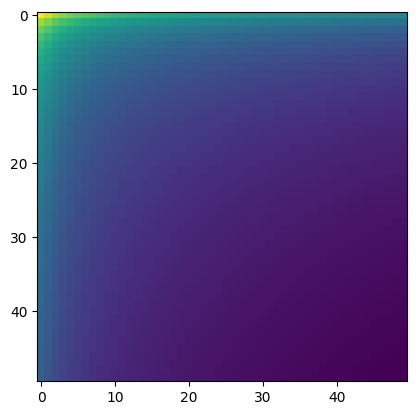